**Итоговая работа**  

**Задание 1**  
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))
```python
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])
```
<b>a)</b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as sts
from scipy.misc import derivative

def cosine(a, b):
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    return np.dot(a, b) / (aLength * bLength)

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

ys = []
for i in range(len(raitings)):                  # попарно сравниваем пользователей
    acs = []
    for j in range(len(raitings)):
        if i == j:
            acs.append(2)                       # заглушка для работы min(): -1 <= arccos(x) <= 1
            continue
        cos = cosine(raitings[i], raitings[j])  # вычисляем косинус угла между векторами
        acs.append(np.arccos(cos))              # добавляем в массив арккосинус
    ys.append(acs.index(min(acs)))              # находим индекс с минимальным значением

print("Наиболее близкие пары:")
for x, y in enumerate(ys):
    print(np.array([raitings[x], raitings[y]]))

Наиболее близкие пары:
[[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]
 [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]]
[[ 9  2  5 10  7  8 10  5  6  2  1  6  8  9  7]
 [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]]
[[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]
 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]]
[[ 6  1  9  7  7  9  2  3  5  1  6  6  3  2  7]
 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]]
[[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
 [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]]
[[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
 [ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]]
[[ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
 [ 6  1  9  7  7  9  2  3  5  1  6  6  3  2  7]]
[[ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
 [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]]
[[ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
 [ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6]]
[[ 5 10  8  8  9  7  2  9  9 10  8  8  8  6 10]
 [ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6]]


<b>b)</b> Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

***Решение***  
Чтобы при таком сжатии потерять как можно меньше данных необходимо использвать разложение матрицы. Матрица несимметричная, поэтому можно использовать сингулярное разложение с приближением матрицей ранга k=5.

***Задание 2***  
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

***Решение:***  
$f(x) = tg^2(sin(x)+cos(2x+3))$. 
$f'(x) = 2 \cdot tg(sin(x)+cos(2x+3)) \cdot (tg(sin(x)+cos(2x+3)))' = \frac {2 \cdot tg(sin(x)+cos(2x+3)) \cdot (sin(x)+cos(2x+3))'}{ cos^2(sin(x)+cos(2x+3))} = \frac {2 \cdot tg(sin(x)+cos(2x+3)) \cdot (cos(x)-2sin(2x+3))}{ cos^2(sin(x)+cos(2x+3))}$.  
$f'(x=x_0) = \frac {2 \cdot tg(sin(1)+cos(5)) \cdot (cos(1)-2sin(5))}{ cos^2(sin(1)+cos(5))} = 55.38591763533786$.

In [2]:
def f(x):
    return np.tan(np.sin(x) + np.cos(2*x + 3)) ** 2

x0 = 1
f1x = derivative(f, x0, dx=1e-8, n=1)
print(f"Значение f'(x) в точке x0 равно {f1x}.")

Значение f'(x) в точке x0 равно 55.38591754117306.


***Задание 3***  
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>.
```python
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))
```

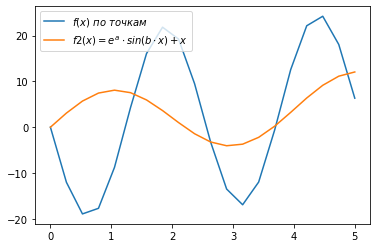

Коэффициенты : a = 1.9528258658399409, b = 1.5662520728171807
Ошибка       : 228.3567196969551


In [3]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

result = minimize(error, (1, 1), method='nelder-mead', options={'xtol': 1e-6})
fx2 = f(x, result.x[0], result.x[1])
plt.plot(x, fx, label="$f(x)\ по\ точкам$")
plt.plot(x, fx2, label="$f2(x) = e^a \cdot sin(b \cdot x) + x$")
plt.legend()
plt.show()
print(f"Коэффициенты : a = {result.x[0]}, b = {result.x[1]}")
print(f"Ошибка       : {error(result.x)}")

***Задание 4***  
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

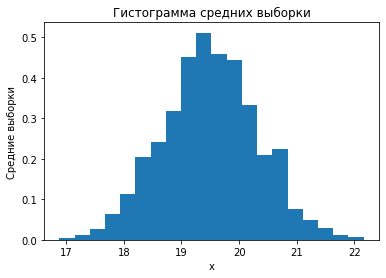

In [4]:
samples_count = 1000
size = 50
low = 10
high = 30

a = np.array([])
for number in range(samples_count):
    sample = np.random.randint(low=low, high=high, size=size)
    a = np.append(a, sample.mean())
plt.hist(a, density=True, bins=high-low, label=f"Средние выборок размера {size}")

plt.title("Гистограмма средних выборки")
plt.ylabel("Средние выборки")
plt.xlabel("x")
plt.show()

***Задание 5***  
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)  
[[1, 4],  
[1, 1]]

***Решение:***

Для нахождения собственных значений выполним преобразование: $A - \lambda \cdot I$,  
где $\lambda$ - собственное значение, которое нужно вычислить, $I$ - единичная матрица.  
Получим матрицу:  
$\begin{bmatrix}
1-\lambda & 4\\
1 & 1-\lambda
\end{bmatrix}$.  

Далее приравняем ее определитель к нулю и вычислим корни уравнения:  
$\begin{vmatrix}
1-\lambda & 4\\
1 & 1-\lambda
\end{vmatrix} = (1 - \lambda)^2 - 4 = 0$.  
$\underline{\lambda_1 = -1, \lambda_2 = 3}$.  

Теперь, подставив полученные $\lambda_i$ в преобразованную матрицу, получим 2 матрицы, или 2 системы линейных уравнений:   
$\begin{equation*}
 \begin{cases}
   2x + 4y = 0, 
   \\
   x + 2y = 0.
 \end{cases}
\end{equation*}$ и $\begin{equation*}
 \begin{cases}
   -2x + 4y = 0, 
   \\
   x - 2y = 0.
 \end{cases}
\end{equation*}$  
Решением этих систем будут собственные векторы исходной матрицы $v_i = \begin{pmatrix}
x\\
y
\end{pmatrix}$:  
$\underline{v_1=\begin{pmatrix}
2\\
-1
\end{pmatrix}, v_2=\begin{pmatrix}
2\\
1
\end{pmatrix}}$.

In [5]:
m = np.array([[1, 4], [1, 1]], dtype=np.float32)
lmd, vec = np.linalg.eig(m)
for i in range(len(lmd)):
    print(f"Собственное значение {str(lmd[i])}, собственный вектор {str(vec[:,i])}")
print("""Вычисленные векторы отличаются от расчетных произведением на некоторую величину,
т.к. полученная система уравнений имеет множество решений.""")

Собственное значение 3.0, собственный вектор [0.8944272 0.4472136]
Собственное значение -1.0, собственный вектор [-0.8944272  0.4472136]
Вычисленные векторы отличаются от расчетных произведением на некоторую величину,
т.к. полученная система уравнений имеет множество решений.
